### Purpose
This takes activity data from a watch and graphs the activity data over time. Weekday activity, weekend activity, and everyday activity is compared.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#Initial cleanup
df = pd.read_csv("Watch_data.csv")
df.set_index("Line", inplace=True)
df.dropna(inplace = True)
df.reset_index(inplace = True)
df.drop("Line", axis = 1, inplace= True)
df["Timestamp"] = pd.to_datetime(df.Date + ' ' + df.Time)
df.drop("Date", axis = 1, inplace= True)
df.drop("Time", axis = 1, inplace= True)

In [3]:
# Adds day of week
lst= []
for time in df.Timestamp:
    x=time.day_of_week
    lst.append(x)
df['Dayofweek'] = lst

In [4]:
#Adds hours since midnight
lst = []
for time in df.Timestamp:
    x = time.hour + time.minute/60 + time.second/3600
    lst.append(x)
df['Hours'] = lst

In [5]:
# Adds integer hours since midnight
lst= []
for time in df.Timestamp:
    x=time.hour
    lst.append(x)
df['int_hour'] = lst

In [6]:
#Filters by day of week
weekday = df.loc[df.Dayofweek <= 4]
weekend = df.loc[df.Dayofweek >= 5]

In [7]:
def meanitup(df, label):
    '''Groups all observations by the value in a column and outputs
    a dataframe of the means of all values as grouped'''
    cols = list(df.columns)
    cols.remove(label)
    labels = list(df[label].unique())
    
    mean = pd.DataFrame(labels)
    
    for column in tqdm(cols, position = 0, leave = False):
        lst = []
        for entry in tqdm(labels, position = 1, leave = False):
            sel_series = df[[label,column]].loc[df[label] == entry][column]

            if sel_series.dtype == 'float64':
                x = sel_series.mean()
                lst.append(x)
            else:
                pass
        if lst != []:
            mean[column] = lst
        else:
            pass
    mean.rename(columns = {0:label}, inplace = True)
    return(mean)

### Mean dataframes
Data was collected every 15 seconds. Data was first filtered by whenever it was collected in the weekday or weekend or not filtered at all. The mean of all datapoints from the same 15 seconds in each of these sets was taken, creating an "Average day" on the weekday, weekend, or all days.

In [8]:
#Creates mean dataframes, and organizes it from midnight forwards
mean_weekend = meanitup(weekend, 'Hours').sort_values(by = 'Hours')
mean_weekday = meanitup(weekday, 'Hours').sort_values(by = 'Hours')
mean_all = meanitup(df, "Hours").sort_values(by = 'Hours')

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

  0%|          | 0/5760 [00:00<?, ?it/s]

In [9]:
mean_int = meanitup(df, "int_hour").sort_values(by = 'int_hour')
weekday_int = meanitup(weekday, "int_hour").sort_values(by = 'int_hour')
weekend_int = meanitup(weekend, "int_hour").sort_values(by = 'int_hour')
mean_int.reset_index(inplace = True, drop = True)

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

### Figure 1
This figure shows an actogram as well as a rolling average with a period of 30 min. This graph clearly shows that activity starts an hour earlier and ends an hour earlier on weekdays compared to weekends. 

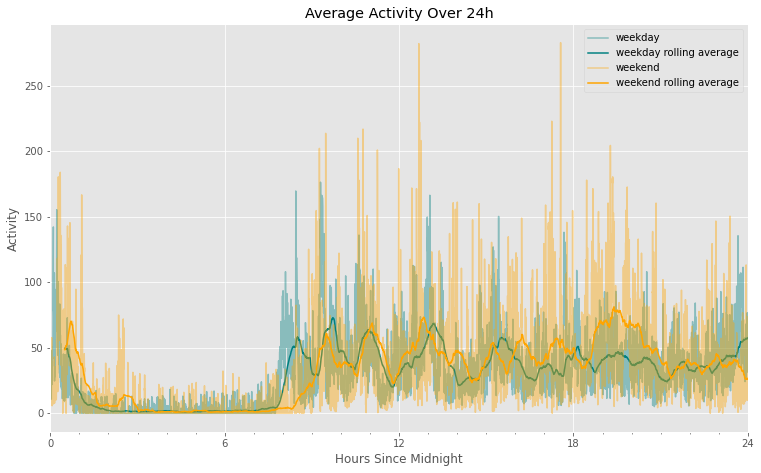

In [76]:
plt.figure(figsize=(12.5,7.5))
ax = plt.axes()
plt.plot(mean_weekday.Hours, mean_weekday.Activity, c = 'teal', alpha = 0.4)
plt.plot(mean_weekday.Hours, mean_weekday.Activity.rolling(120).mean(), c = 'teal', alpha = 1)
plt.plot(mean_weekend.Hours, mean_weekend.Activity, c='orange', alpha = .4)
plt.plot(mean_weekend.Hours, mean_weekend.Activity.rolling(120).mean(), c='orange', alpha = 1)
ax.set_xticks([0,6,12,18,24])
ax.set_xticks(list(range(24)), minor = True)
plt.xlim([0,24])
plt.xlabel('Hours Since Midnight')
plt.ylabel('Activity')
plt.title('Average Activity Over 24h')
plt.legend(["weekday","weekday rolling average", "weekend", "weekend rolling average"])
plt.savefig('mean_act.png')

### Figure 2
This figure uses a polar chart to show average activity in each hour of the day. This graph seems to show that the earlier wake time on weekdays is larger than the difference in start of sleep times. It also shows that activity is generally greater on weekends than weekdays.

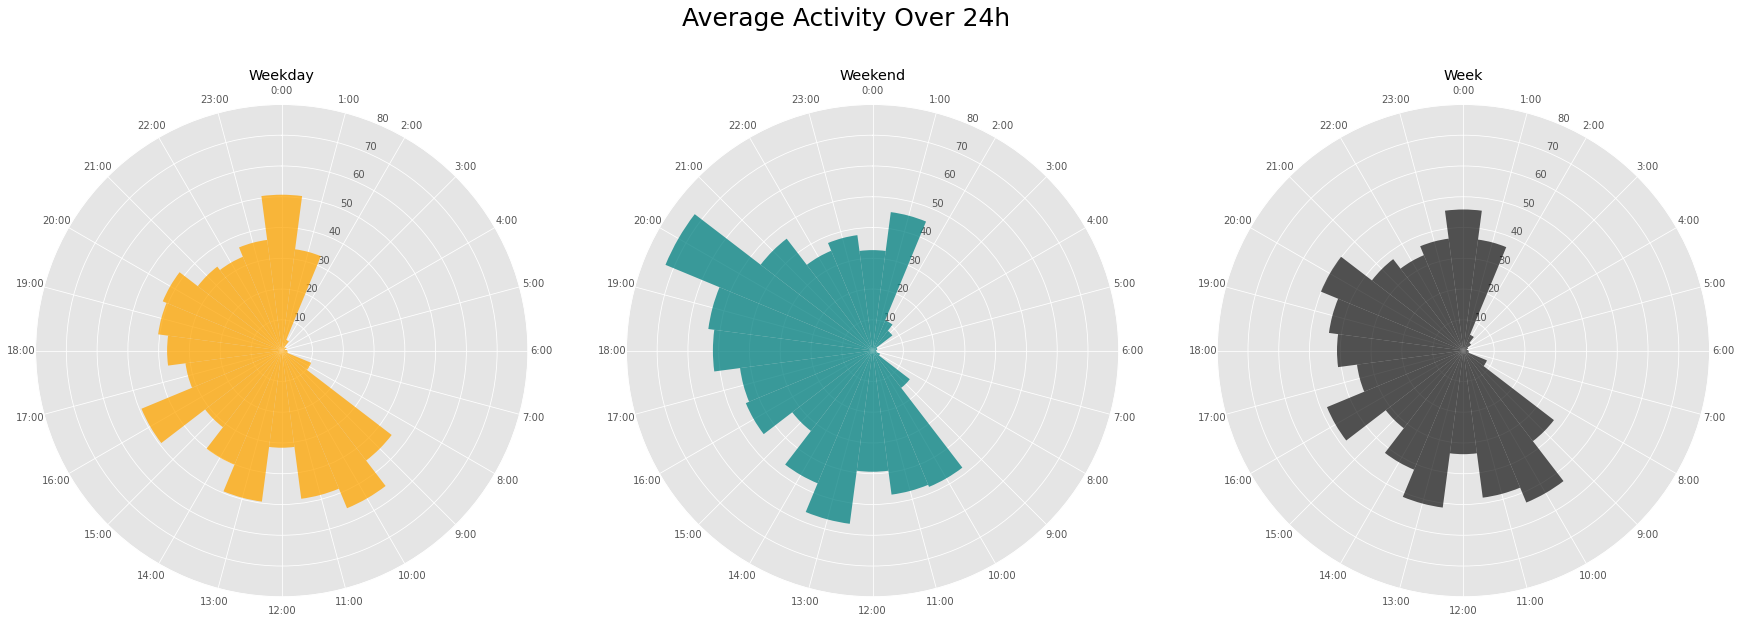

In [11]:
fig = plt.figure(figsize=(30, 10))
fig.suptitle('Average Activity Over 24h', size = 25)
ax1 = plt.subplot(131, polar=True)
ax2 = plt.subplot(132, polar=True)
ax3 = plt.subplot(133, polar=True)
axs = [ax1, ax2, ax3]

for ax in axs:
    # Set the circumference labels
    ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
    ax.set_xticklabels([f"{i}:00" for i in range(24)])

    # Make the labels go clockwise
    ax.set_theta_direction(-1)       

    # Place 0 at the top
    ax.set_theta_offset(np.pi/2.0)
    
    ax.set_ylim([0,80])

equals = np.deg2rad(np.arange(24) / 24 * 360)+ np.pi/12

ax1.bar(equals, weekday_int.Activity, color = 'orange', width = equals[0], alpha = .75) 
ax1.set_title('Weekday')

ax2.bar(equals, weekend_int.Activity, color = 'teal', width = equals[0], alpha = .75)
ax2.set_title('Weekend')

ax3.bar(equals, mean_int.Activity, color = 'k', width = equals[0], alpha = .65)
ax3.set_title('Week')

plt.savefig('polar_act.png')

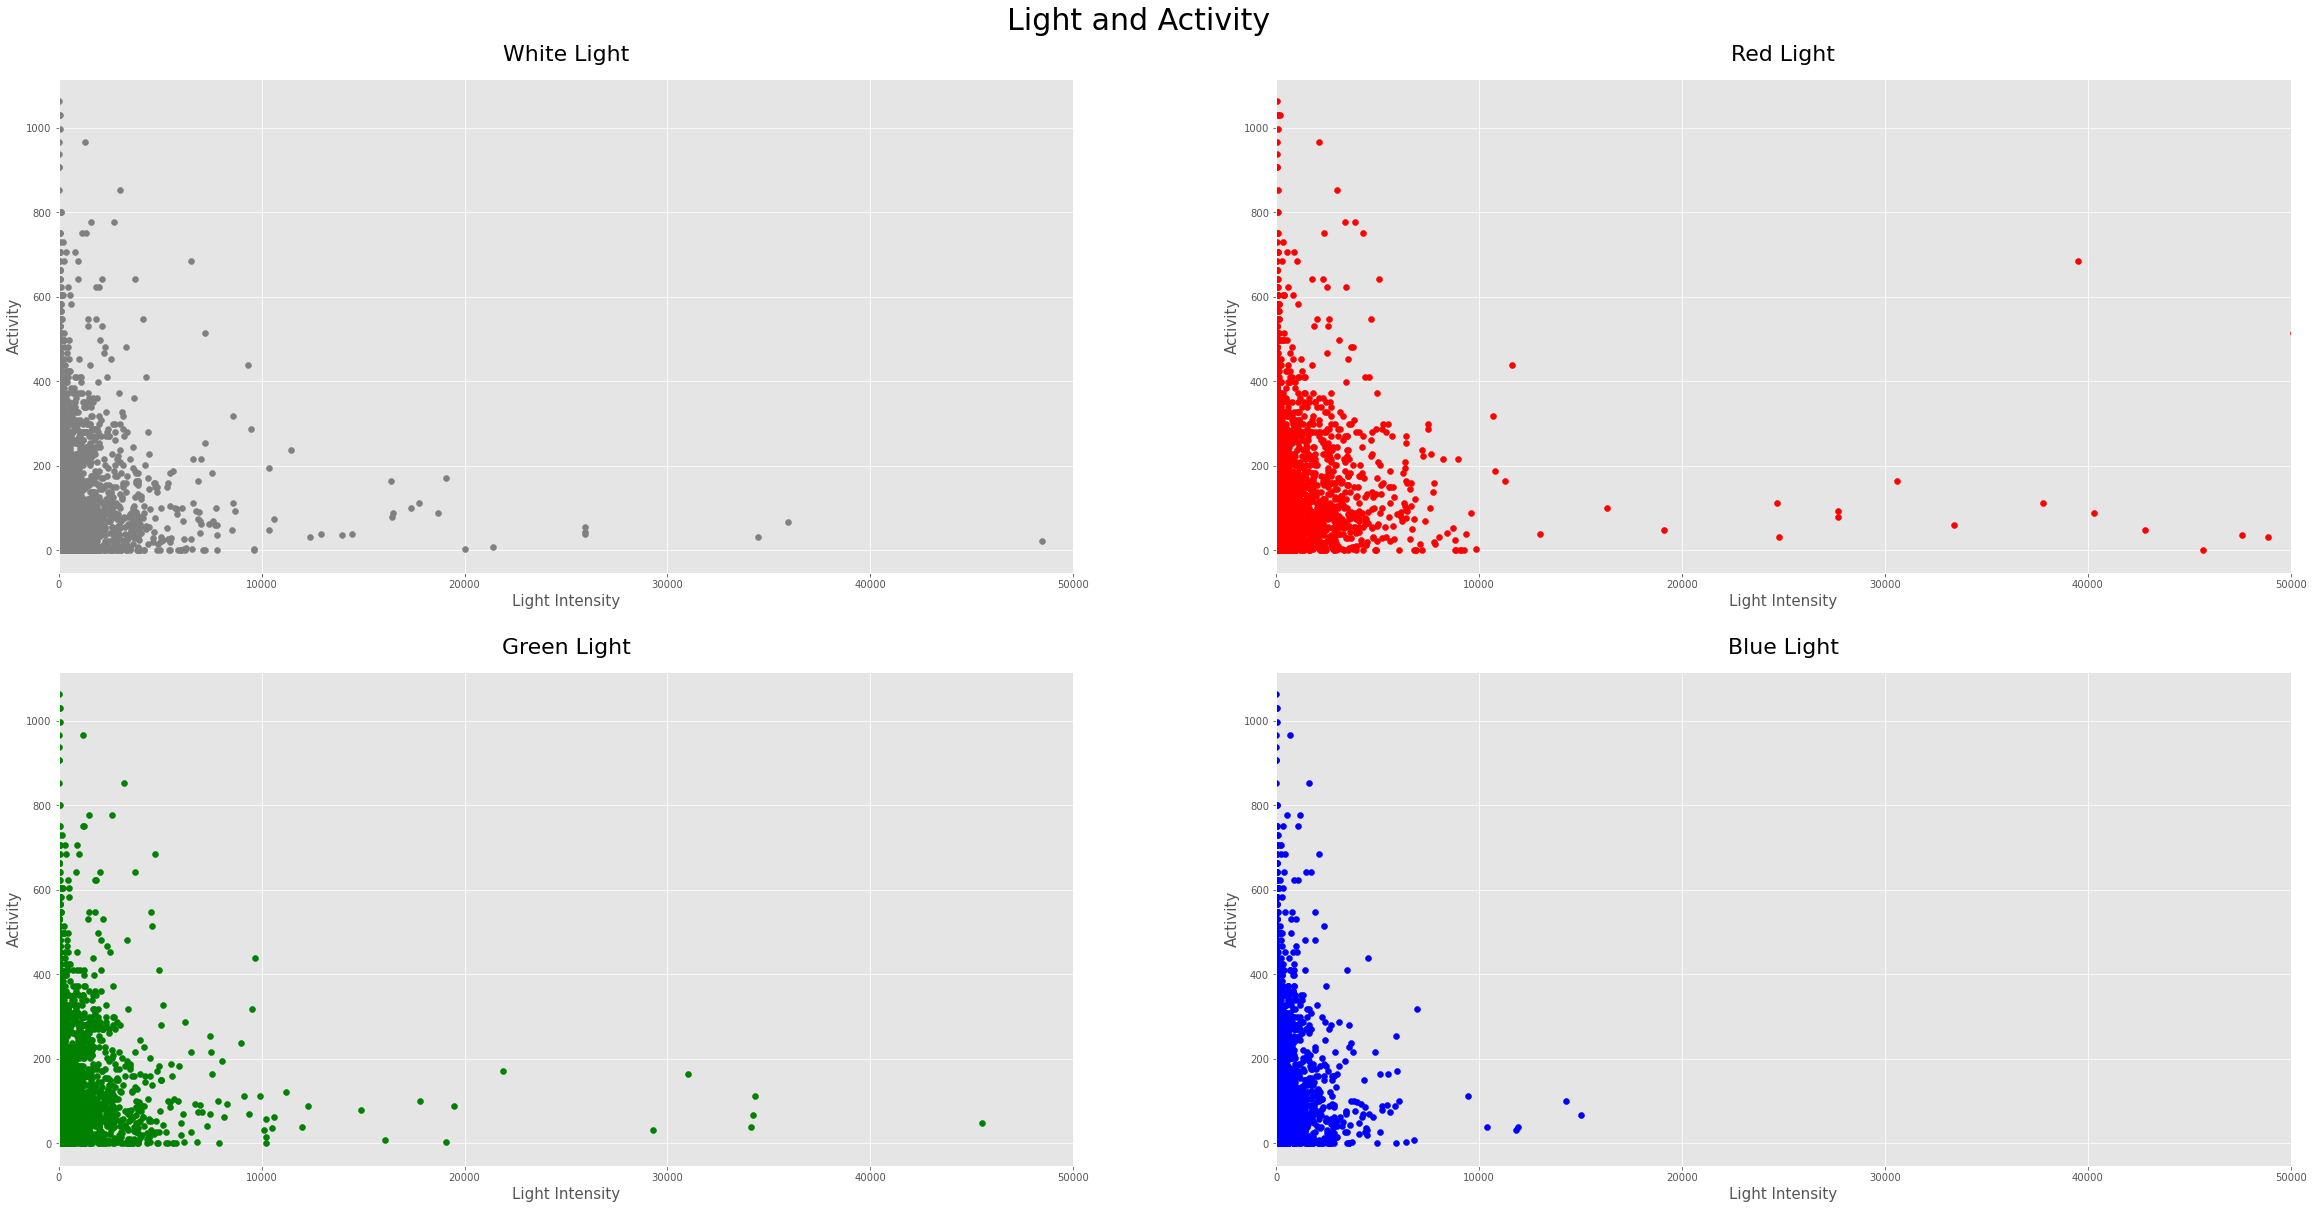

In [75]:
fig = plt.figure(figsize=(40, 20))
fig.suptitle('Light and Activity', size = 30, y = .93)
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)
axs = [ax1,ax2,ax3,ax4]

for ax in axs:
    ax.set_ylabel('Activity', size = 15)
    ax.set_xlabel("Light Intensity",size = 15)
    ax.set_xlim([0,50000])

ax1.scatter(df['White Light'], df['Activity'], color = 'grey')
ax1.set_title('White Light', size = 22, y=1.025)
ax2.scatter(df['Red Light'], df['Activity'], color = 'r')
ax2.set_title('Red Light', size = 22, y=1.025)
ax3.scatter(df['Green Light'], df['Activity'], color = 'g')
ax3.set_title('Green Light', size = 22, y=1.025)
ax4.scatter(df['Blue Light'], df['Activity'], color = 'b')
ax4.set_title('Blue Light', size = 22, y=1.025)

plt.savefig('light_act.png')

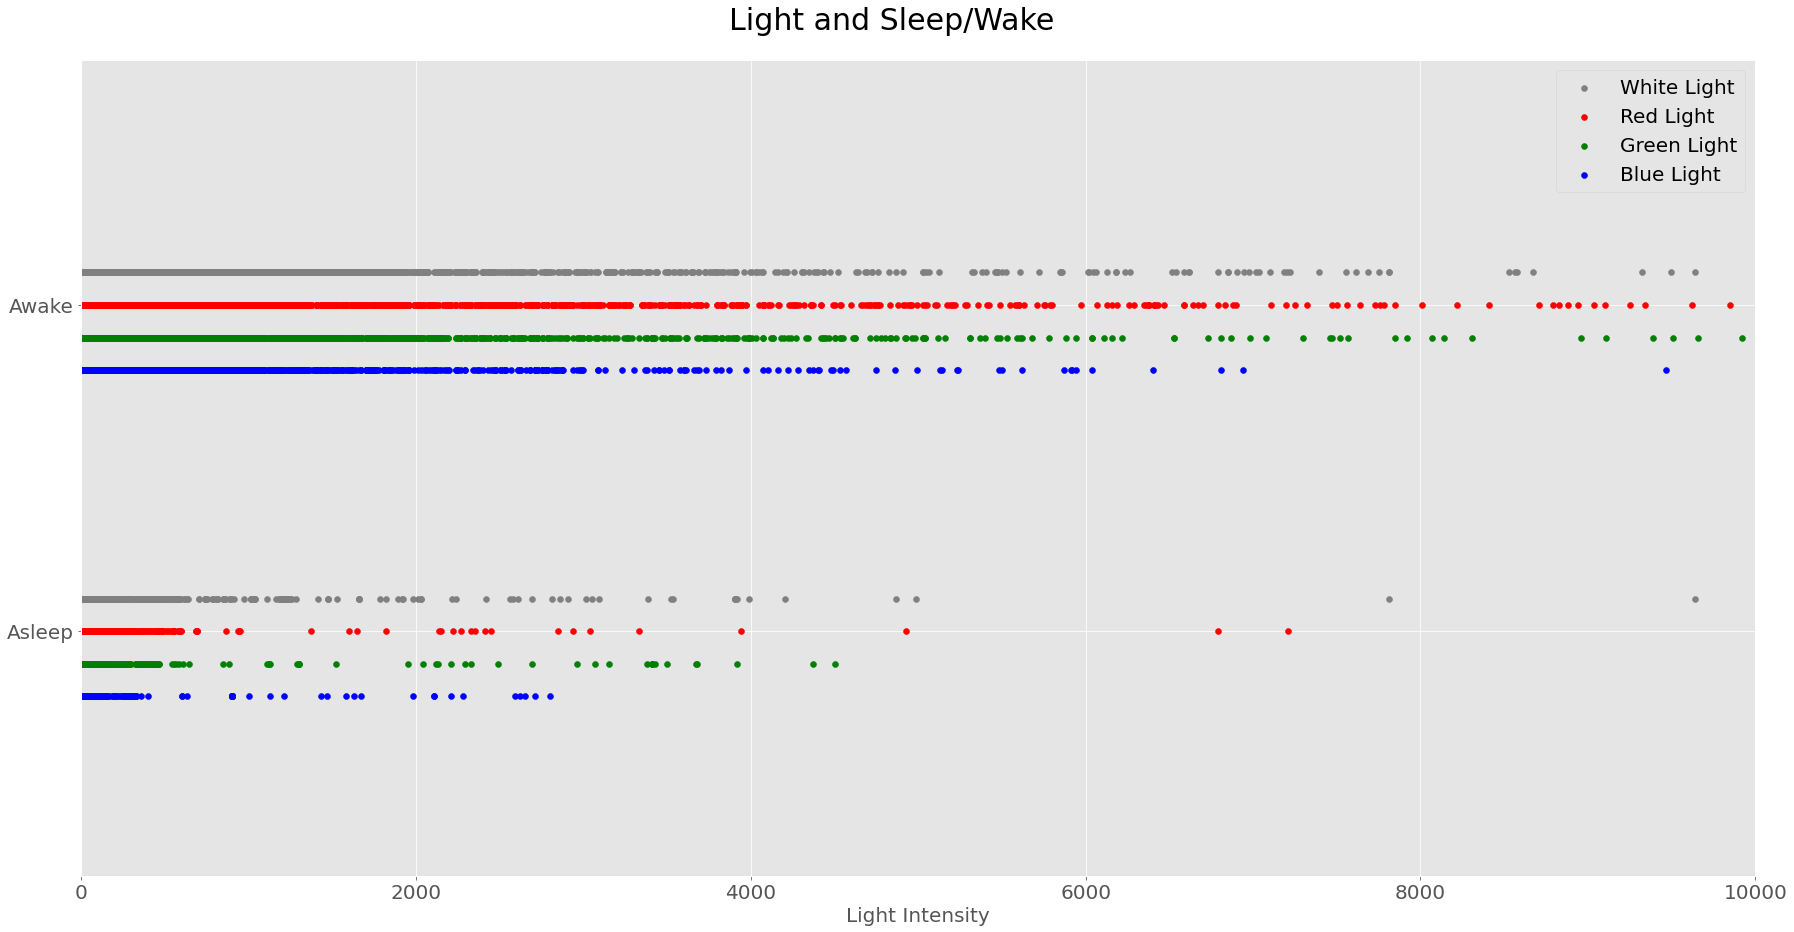

In [74]:
fig = plt.figure(figsize=(30,15))
fig.suptitle('Light and Sleep/Wake', size = 30, y = .93)
ax = plt.subplot(111)

ax.set_xlabel("Light Intensity", size = 20)
ax.set_xlim([0,10000])
ax.set_ylim([-.75, 1.75])
ax.set_yticks([0,1])
ax.set_yticklabels(['Asleep','Awake'], size = 20)
ax.tick_params(axis='x', labelsize=20)
    
    
ax.scatter(df['White Light'], df['Sleep/Wake'] + 0.1, color = 'grey')
ax.scatter(df['Red Light'], df['Sleep/Wake'], color = 'r')
ax.scatter(df['Green Light'], df['Sleep/Wake']-0.1, color = 'g')
ax.scatter(df['Blue Light'], df['Sleep/Wake']-0.2, color = 'b')

ax.legend(["White Light", "Red Light", "Green Light", "Blue Light"], fontsize = 20)

plt.savefig('light_sleep.png')